# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  "banknote_authentication.csv" can be found in the data  directory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scrapbook as sb
import sklearn

In [2]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [3]:
sb.glue("Who", ["Vitoria", "Stavis"])

In [4]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [5]:
data = pd.read_csv('data/banknotes_data.csv')

In [6]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [7]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [9]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [10]:
lbls_train = data_train['counterfeit']

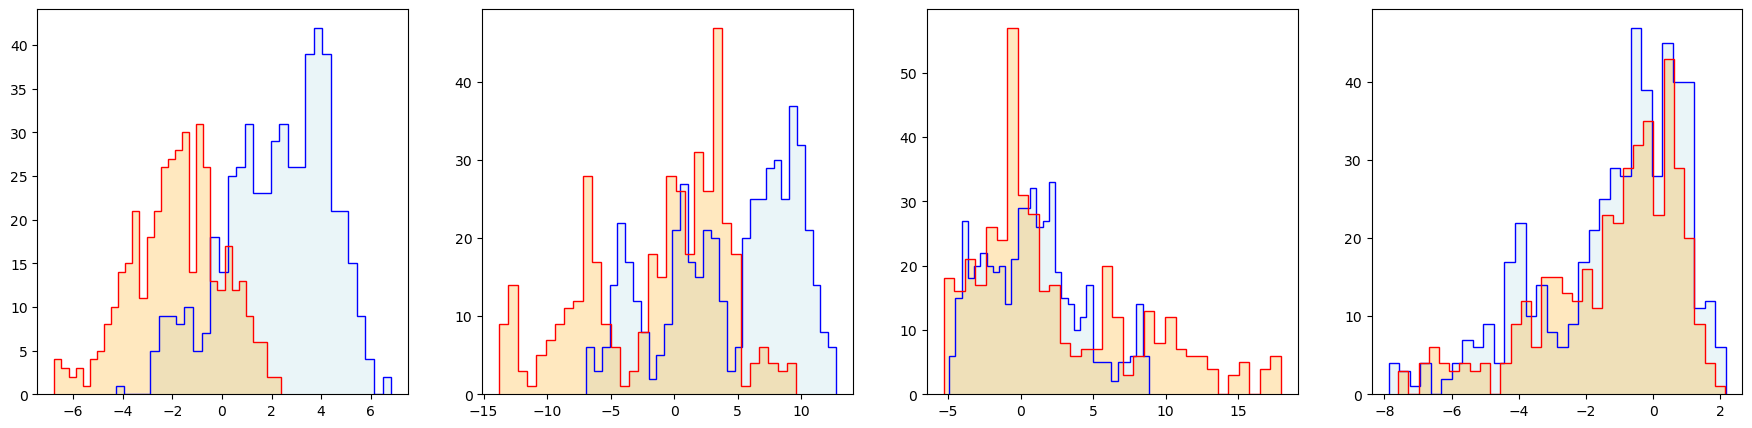

In [11]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

You will have to install a popular plotting library `seaborn`

In [12]:
import seaborn

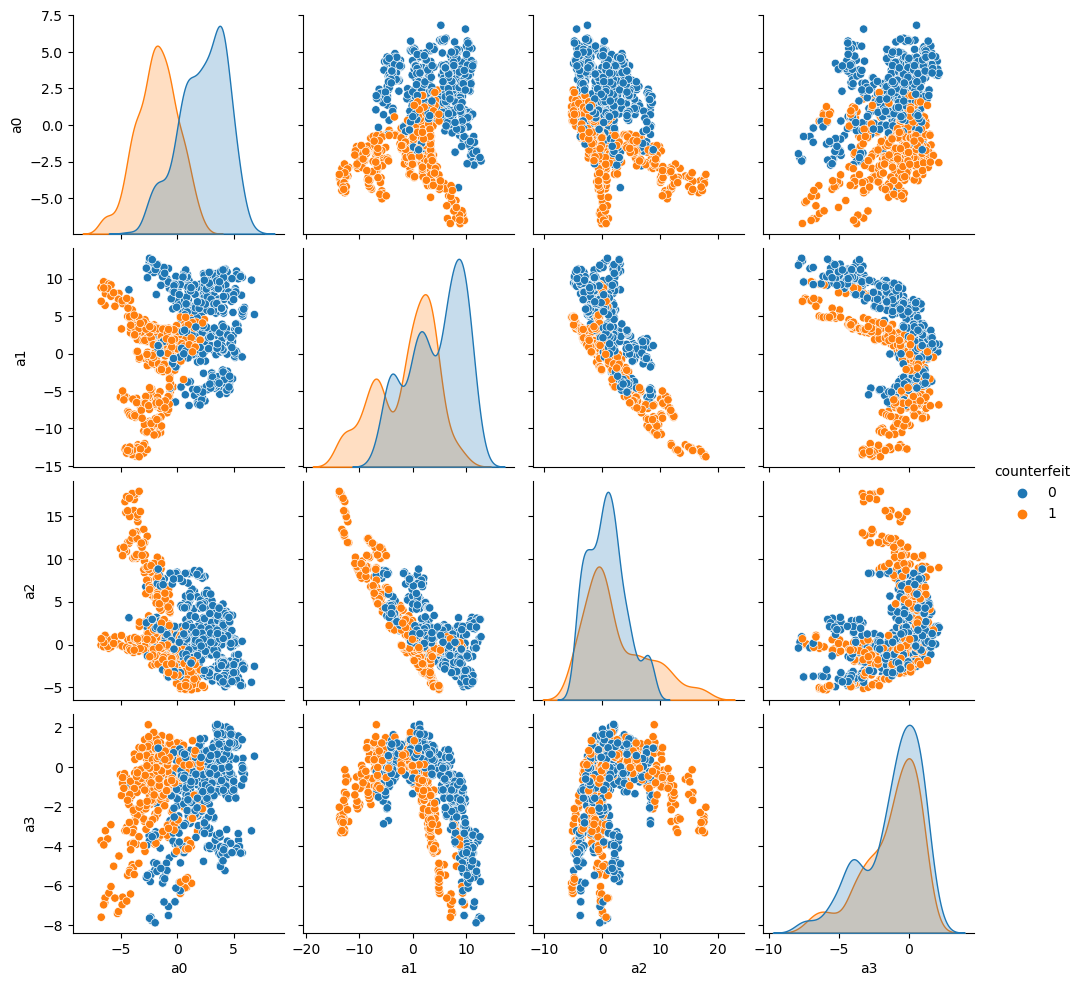

In [13]:
seaborn.pairplot(data_train.iloc[:,0:5], hue='counterfeit');

In [14]:
len(data_train)

932

## Problem 1

Implement Gaussian  Bayes classifier using only one feature. Which feature will you choose? Calculate the confusion matrix (normalized as to show rates), ROC AUC score and plot ROC curve. Do this bot for training and validation set. Plot both curves on the same plot. Save everything using `scrapbook`. 

__Hint__ For calculating metrics and plotting ROC curves you may use functions from scikit-learn: `roc_curve`, `roc_auc_score` and `confusion matrix`. For estimating normal distribution parameters  use `norm.fit` `from scipy.stats`. Use `norm.pdf` for normal probability density function.

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

In [16]:
X_train = data_train['a0']
X_test = data_test['a0']
y_train = data_train['counterfeit'] 
y_test = data_test['counterfeit']

print(len(X_train), len(X_test), len(y_train), len(y_test))

932 234 932 234


In [17]:


# make pdf function with condicional probablity for Gaussian NB with 1 feature
def make_pdf(data, labels):

    # data and labels
    positives = data[labels == 1]
    negatives = data[labels == 0]

    mean_p, std_p = norm.fit(positives)
    mean_n, std_n = norm.fit(negatives)

    pdf_p = norm(mean_p, std_p).pdf
    pdf_n = norm(mean_n, std_n).pdf

    p_p = labels.mean()
    p_n = 1-p_p
    
    def pdf(x):
        return pdf_p(x)*p_p/(pdf_p(x)*p_p+pdf_n(x)*p_n)
    
    return pdf

In [18]:
# pdf counterfeit conditional a0
pdf_1feat = make_pdf(X_train, y_train)

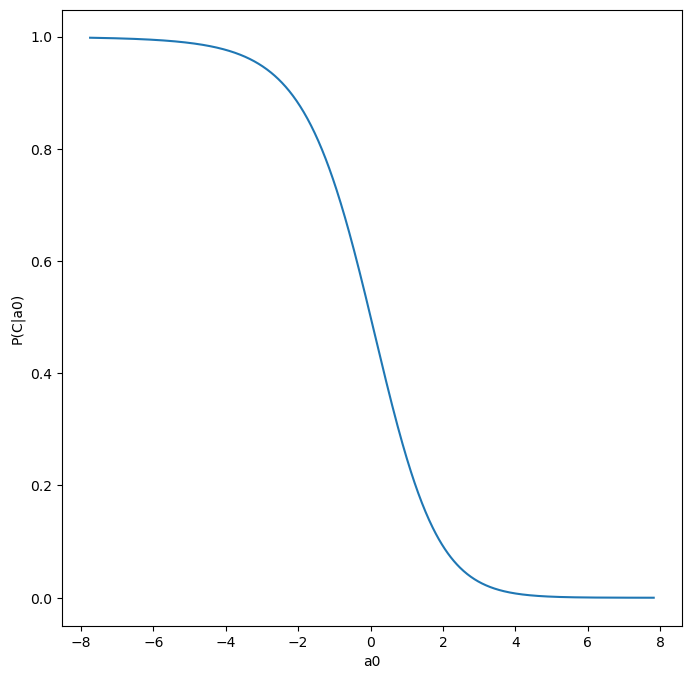

In [19]:
fig, ax = plt.subplots()
hs = np.linspace(min(X_train)-1, max(X_train)+1,len(X_train))
ax.plot(hs, pdf_1feat(hs));
ax.set_xlabel("a0");
ax.set_ylabel("P(C|a0)");

In [20]:
cm_train = confusion_matrix(y_train,pdf_1feat(X_train)>0.5, normalize='true')
cm_train

array([[0.85328185, 0.14671815],
       [0.17149758, 0.82850242]])

In [21]:
from scipy.optimize import fsolve
threshold = fsolve(lambda h: pdf_1feat(h)-0.5, 0.5)[0]
print(threshold)

0.0015992005864954657


In [22]:
accuracy_score(y_test,X_test<=threshold)

0.8504273504273504

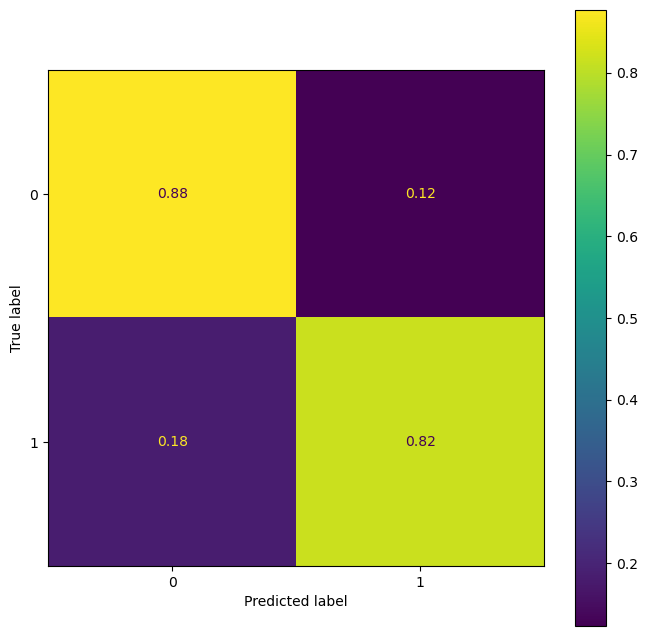

In [23]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test,X_test<=threshold, normalize='true');

In [24]:
cm_test = confusion_matrix(y_test,X_test<=threshold, normalize='true')
(tnr, fpr),(fnr, tpr) = cm_test


In [25]:
print(tnr, fpr, fnr, tpr)

0.8769230769230769 0.12307692307692308 0.18269230769230768 0.8173076923076923


In [29]:
fprs, tprs, thds = roc_curve(y_test, pdf_1feat(X_test))
auc = roc_auc_score(y_test, pdf_1feat(X_test))

array([1.21256394e-03, 9.06794835e-01, 9.60499837e-01, 9.50743880e-01,
       3.62319307e-01, 9.66924353e-01, 9.43691225e-01, 8.05478652e-01,
       4.21419739e-02, 8.83687280e-01, 8.64281127e-01, 8.47347122e-01,
       9.14934643e-01, 1.52586061e-02, 9.71991334e-01, 5.06746049e-01,
       9.95053956e-01, 5.57129752e-01, 4.87223452e-01, 6.03205243e-01,
       3.32240295e-03, 1.35981417e-01, 3.97124441e-02, 3.62319307e-01,
       4.29164362e-01, 4.97837350e-01, 8.55093696e-01, 9.11668570e-03,
       9.79848996e-01, 1.83071919e-03, 2.15219785e-01, 9.01711000e-01,
       9.51481110e-01, 7.94209906e-02, 6.76611853e-01, 9.20608109e-01,
       9.92286638e-03, 9.30009897e-01, 5.10102996e-01, 2.56122356e-01,
       1.48067571e-01, 7.27474376e-02, 9.53158885e-01, 4.49346560e-03,
       7.11082468e-02, 9.06265343e-01, 9.96036842e-01, 1.51573497e-02,
       3.37739707e-01, 7.62765361e-01, 1.02774041e-01, 3.89488634e-02,
       3.25503096e-03, 5.73729896e-01, 3.95976167e-01, 5.44787942e-01,
      

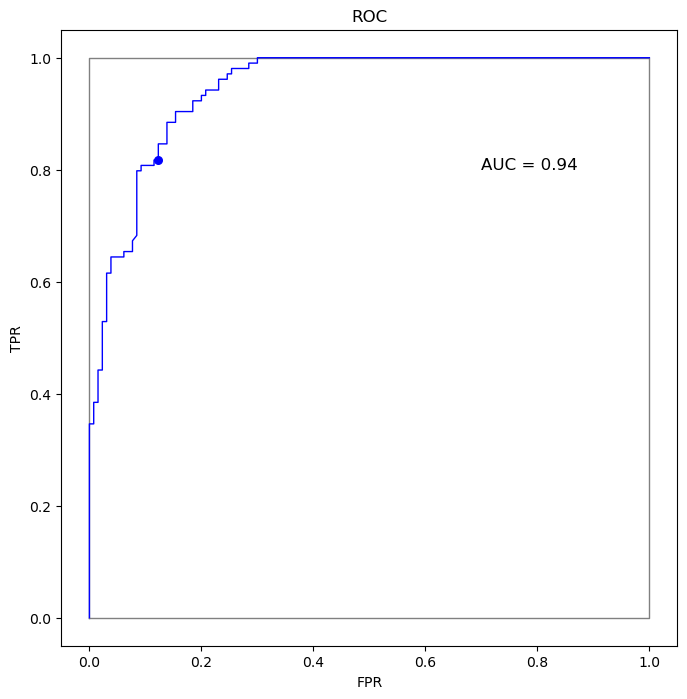

In [30]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect(1)
ax.set_xlabel('FPR');
ax.set_ylabel('TPR');
ax.set_title('ROC')
ax.plot([0,1,1,0,0],[0,0,1,1,0], '-', color='grey', linewidth=1)
roc = ax.plot(fprs,tprs, color='blue', linewidth=1);

ax.scatter([fpr],[tpr],s = 30, edgecolor='blue', zorder=5, facecolor='blue');
ax.text(0.7, 0.8, "AUC = {:4.2f}".format(auc), fontsize=12);

## Problem 2

Same as Problem 1 but now implement Gaussian Naive Bayes using two features. Compare ROC curves on the test set. What is teh improvement of AUC score on the test set?

In [97]:
feats[:len(feats)-1]

0      -1.1306
1      -1.1188
2       2.6719
3      -4.1409
4       1.4507
         ...  
1161    1.2138
1162   -2.4621
1163    4.0948
1164   -4.4779
1165    3.8481
Name: a0, Length: 1166, dtype: float64

In [108]:
feats = data.columns.tolist()
feats = feats[:len(feats)-1]

for i in range(len(feats)):
    for j in range(i+1, len(feats)):
        feature1 = feats[i]
        feature2 = feats[j]
        print(data[[feature1, feature2]].corr())
        print()
      
            

          a0        a1
a0  1.000000  0.274703
a1  0.274703  1.000000

          a0        a2
a0  1.000000 -0.392987
a2 -0.392987  1.000000

          a0        a3
a0  1.000000  0.279258
a3  0.279258  1.000000

          a1        a2
a1  1.000000 -0.793347
a2 -0.793347  1.000000

          a1        a3
a1  1.000000 -0.516437
a3 -0.516437  1.000000

         a2       a3
a2  1.00000  0.32092
a3  0.32092  1.00000



In [109]:
X_train = data_train[['a0', 'a1']]
X_test = data_test[['a0', 'a1']]

print(len(X_train), len(X_test), len(y_train), len(y_test))

932 234 932 234


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


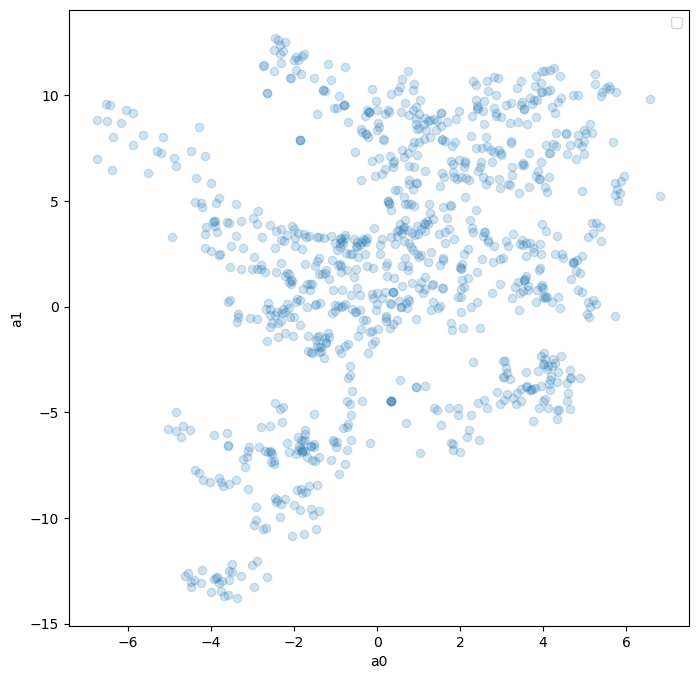

In [110]:
plt.scatter(X_train['a0'], X_train['a1'], alpha=0.2);
plt.xlabel('a0')
plt.ylabel('a1');
plt.legend();

In [111]:
# make pdf function with condicional probablity for Gaussian NB with 2 features
def make_pdf_2feat(labels, a0, a1 ):
    
    positives = labels==1
    negatives = labels==0
    
    pdf_a0_p = st.norm(*st.norm.fit(a0[positives])).pdf
    pdf_a0_n = st.norm(*st.norm.fit(a0[negatives])).pdf 
    
    pdf_a1_p = st.norm(*st.norm.fit(a1[positives])).pdf
    pdf_a1_n = st.norm(*st.norm.fit(a1[negatives])).pdf                  
                      
    
    p_p = labels.mean()
    p_n = 1-p_p
    
    def pdf(a0_input, a1_input):
        p_prod = pdf_a0_p(a0_input)*pdf_a1_p(a1_input)*p_p
        n_prod = pdf_a0_n(a0_input)*pdf_a1_n(a1_input)*p_n
        
        
        return p_prod/(p_prod +n_prod)
        
    return pdf

In [112]:
pdf_2feat = make_pdf_2feat(y_test, X_test['a0'], X_test['a1'])

In [113]:
(_, fpr_2feat),(_, tpr_2feat) = confusion_matrix(y_test, pdf_2feat(X_test['a0'], X_test['a1'])>0.5, normalize='true' )

In [114]:
print(fpr_2feat, tpr_2feat)

0.13076923076923078 0.8365384615384616


In [115]:
fprs_2feat, tprs_2feat, thds_2feat = roc_curve(y_test, pdf_2feat(X_test['a0'], X_test['a1']))
auc_2feat = roc_auc_score(y_test, pdf_2feat(X_test['a0'], X_test['a1']))

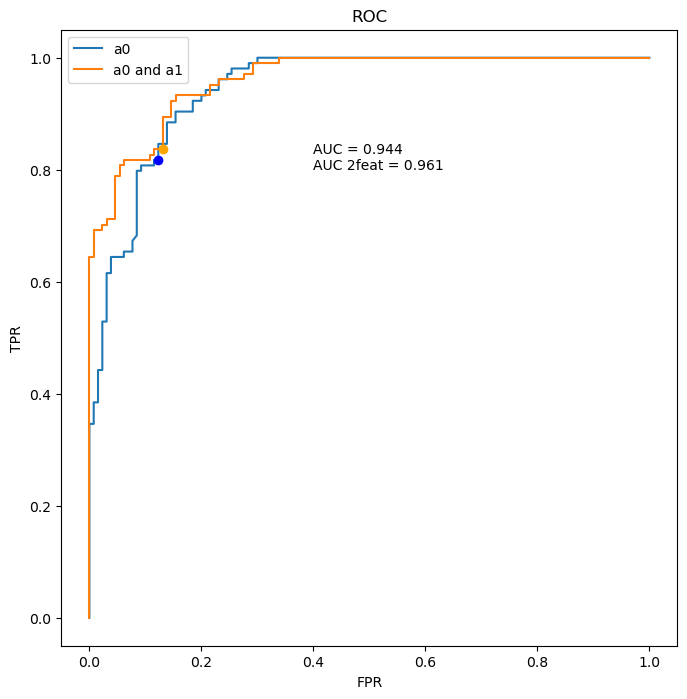

In [170]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect(1)
ax.set_xlabel('FPR');
ax.set_ylabel('TPR');
ax.set_title('ROC')
ax.plot(fprs, tprs, label='a0')
ax.scatter([fpr],[tpr], color='blue', zorder = 5)
ax.plot(fprs_2feat, tprs_2feat,  label = "a0 and a1")
ax.scatter([fpr_2feat],[tpr_2feat], color='orange', zorder = 5)
ax.text(0.4,0.8,"AUC = {:.3f}\nAUC 2feat = {:.3f}".format(auc, auc_2feat))
ax.legend();

In [153]:
auc_2feat/auc -1
# it slightly increased

0.017350095954255407

## Problem 3

Same as Problem 2 but now implement Gaussian Naive Bayes using all features.

In [154]:
X_train = data_train
X_test = data_test

932 234 932 234


In [173]:
# make pdf function with condicional probablity for Gaussian NB with 2 features
def make_pdf_all(labels, a0, a1, a2, a3):
    
    positives = labels==1
    negatives = labels==0
    
    pdf_a0_p = st.norm(*st.norm.fit(a0[positives])).pdf
    pdf_a0_n = st.norm(*st.norm.fit(a0[negatives])).pdf 
    
    pdf_a1_p = st.norm(*st.norm.fit(a1[positives])).pdf
    pdf_a1_n = st.norm(*st.norm.fit(a1[negatives])).pdf      
    
    pdf_a2_p = st.norm(*st.norm.fit(a2[positives])).pdf
    pdf_a2_n = st.norm(*st.norm.fit(a2[negatives])).pdf 
    
    pdf_a3_p = st.norm(*st.norm.fit(a3[positives])).pdf
    pdf_a3_n = st.norm(*st.norm.fit(a3[negatives])).pdf                                
    
    p_p = labels.mean()
    p_n = 1-p_p
    
    def pdf(a0_input, a1_input, a2_input, a3_input):
        p_prod = pdf_a0_p(a0_input)*pdf_a1_p(a1_input)*pdf_a2_p(a2_input)*pdf_a3_p(a3_input)*p_p
        n_prod = pdf_a0_n(a0_input)*pdf_a1_n(a1_input)*pdf_a2_n(a2_input)*pdf_a3_n(a3_input)*p_n
        
        
        return p_prod/(p_prod +n_prod)
        
    return pdf

In [174]:
pdf_all = make_pdf_all(y_train, X_train['a0'], X_train['a1'], X_train['a2'], X_train['a3'])

In [175]:
pdf_test = pdf_all(X_test['a0'], X_test['a1'], X_test['a2'], X_test['a3'])

In [168]:
(_, fpr_all),(_, tpr_all) = confusion_matrix(y_test, pdf_test>0.5, normalize='true' )

In [169]:
fprs_all, tprs_all, thds_all = roc_curve(y_test, pdf_test)
auc_all = roc_auc_score(y_test, pdf_test)

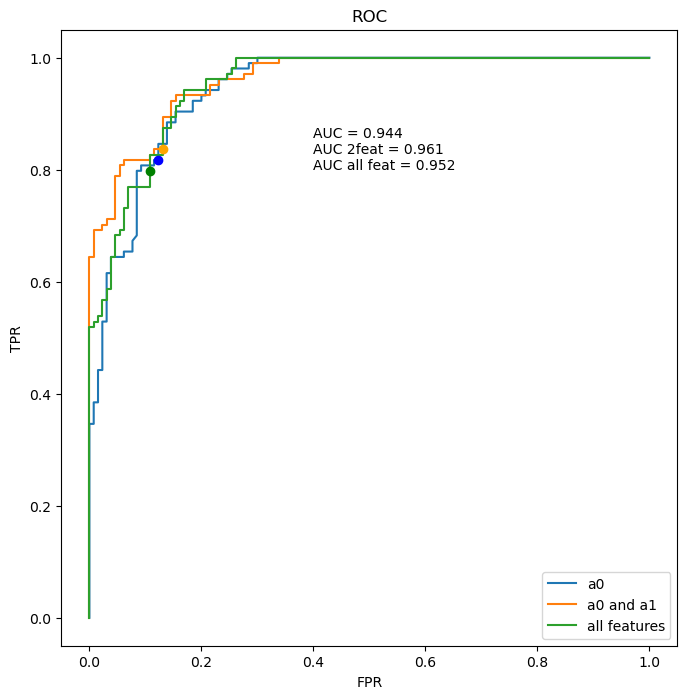

In [171]:
fig, ax = plt.subplots(figsize=[8,8])
ax.set_aspect(1)
ax.set_xlabel('FPR');
ax.set_ylabel('TPR');
ax.set_title('ROC')

ax.plot(fprs, tprs, label='a0')
ax.scatter([fpr],[tpr], color='blue', zorder = 5)

ax.plot(fprs_2feat, tprs_2feat,  label = "a0 and a1")
ax.scatter([fpr_2feat],[tpr_2feat], color='orange', zorder = 5)

ax.plot(fprs_all, tprs_all,  label = "all features")
ax.scatter([fpr_all],[tpr_all], color='green', zorder = 5)

ax.text(0.4,0.8,"AUC = {:.3f}\nAUC 2feat = {:.3f}\nAUC all feat = {:.3f}".format(auc, auc_2feat, auc_all))
ax.legend();

using all features didn't result in the best AUC. possibly because there is dependency between a1 and a2 (corr = -0.79)